###### Import helper modules

In [668]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings

In [729]:
from datasist.structdata import detect_outliers
from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler , StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.preprocessing import PolynomialFeatures

In [670]:
warnings.filterwarnings('ignore')

In [671]:
%matplotlib inline 

In [672]:
sns.set_theme(context = 'paper' , style = 'darkgrid' , palette = 'Paired' , font_scale = 1.1 ,
             rc = {'figure.figsize' : (8 , 4)}) 

###### read dataset

In [673]:
df = pd.read_csv('Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


###### drop unneeded columns that can make high variance (overfitting)

In [674]:
df.drop(['PassengerId' , 'Name'] , axis = 1 , inplace = True)

###### check data info to see missing records and data types

In [675]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


###### some missing values with different percentage 
drop Cabin column & Embarked missing records 

In [676]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

###### check dupliacted record 

In [677]:
df.duplicated().sum()

15

In [678]:
df.drop_duplicates(inplace = True , ignore_index = True)

###### drop Embarked missing records 

In [679]:
df.dropna(subset = ['Embarked'] , axis = 0 , inplace = True) 

In [680]:
df.reset_index(inplace = True , drop = True)

###### drop Cabin columns (has large amount of missing )

In [681]:
df.drop(['Cabin'] , axis = 1 , inplace = True)

###### Bivariate analysis with target to show which is important and correlated

In [682]:
df['Pclass'].value_counts()

3    479
1    213
2    182
Name: Pclass, dtype: int64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

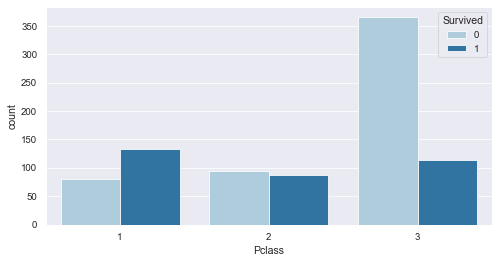

In [683]:
sns.countplot(data = df , x = 'Pclass' , hue = 'Survived')

In [684]:
df['Survived'].value_counts(normalize = True)*100

0    61.784897
1    38.215103
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

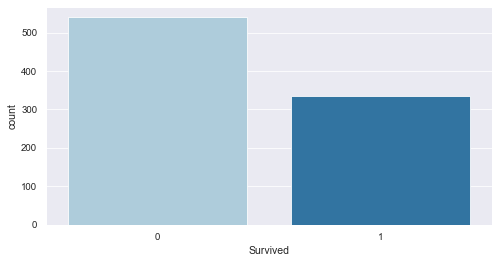

In [685]:
sns.countplot(df['Survived'])

In [686]:
df['Sex'].unique()

array(['male', 'female'], dtype=object)

<AxesSubplot:xlabel='Sex', ylabel='count'>

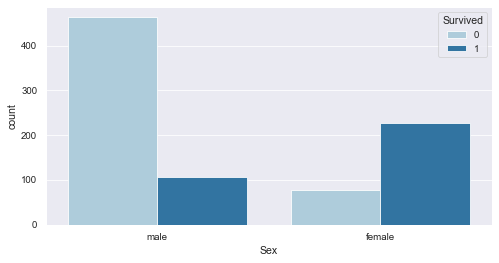

In [687]:
sns.countplot(data = df , x = 'Sex' , hue = 'Survived')

In [688]:
df['Age'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Age,709.0,29.687475,14.481064,0.42,20.0,28.0,38.0,80.0


<AxesSubplot:xlabel='Age', ylabel='Density'>

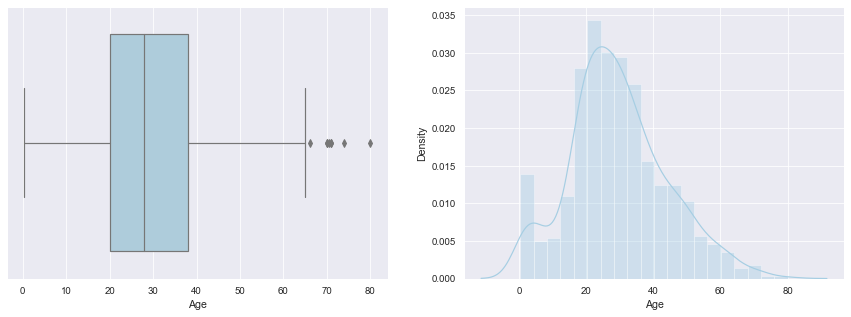

In [689]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 5))
sns.boxplot(df['Age'] , ax = axis[0])
sns.distplot(df['Age'] , ax = axis[1])

In [690]:
def Detect_Outliers(data , col):
    des = data[col].describe()
    IQR = des['75%'] - des['25%']
    minw , maxw = des['25%'] - (1.5*IQR) , des['75%'] + (1.5*IQR)
    return data[(data[col] > maxw)|(data[col] < minw)].index

###### outlier point is true data and make variane in data cant drop it 

In [691]:
df.loc[Detect_Outliers(df,'Age')]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
33,0,2,male,66.0,0,0,C.A. 24579,10.5000,S
95,0,1,male,71.0,0,0,PC 17754,34.6542,C
115,0,3,male,70.5,0,0,370369,7.7500,Q
486,0,1,male,71.0,0,0,PC 17609,49.5042,C
622,1,1,male,80.0,0,0,27042,30.0000,S
662,0,2,male,70.0,0,0,C.A. 24580,10.5000,S
733,0,1,male,70.0,1,1,WE/P 5735,71.0000,S
835,0,3,male,74.0,0,0,347060,7.7750,S


In [692]:
df['SibSp'].value_counts()

0    601
1    207
2     27
4     18
3     14
5      5
8      2
Name: SibSp, dtype: int64

<AxesSubplot:xlabel='SibSp', ylabel='count'>

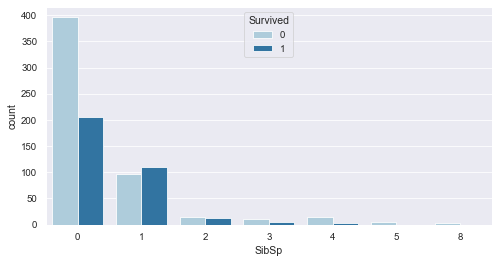

In [693]:
sns.countplot(data = df , x = 'SibSp' , hue = 'Survived')

###### the target is not highly affected by it (drop it )

In [694]:
df.drop(['SibSp'] , axis = 1 , inplace = True)

In [695]:
df['Parch'].value_counts()

0    670
1    114
2     75
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

<AxesSubplot:xlabel='Parch', ylabel='count'>

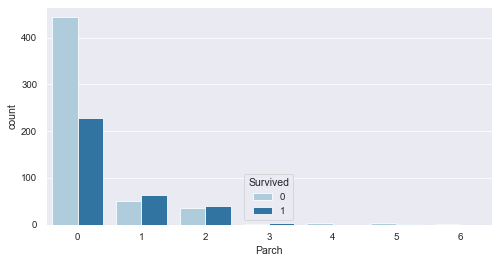

In [696]:
sns.countplot(data = df , x = 'Parch' , hue = 'Survived')

###### the target is not highly affected by it  (drop it )

In [697]:
df.drop(['Parch'] , axis = 1 , inplace = True)

###### ticket has too much variance that is not good (overfitting) drop it 

In [698]:
df['Ticket'].value_counts()

347082      7
3101295     6
CA 2144     6
347088      6
382652      5
           ..
2693        1
PC 17612    1
349233      1
349236      1
370376      1
Name: Ticket, Length: 680, dtype: int64

In [699]:
df.drop(['Ticket'] , axis = 1 ,inplace = True)

In [700]:
df['Fare'].describe().to_frame().T

,count,mean,std,min,25%,50%,75%,max
Fare,874.0,31.925595,49.979756,0.0,7.8958,14.4,30.5,512.3292


<AxesSubplot:xlabel='Fare', ylabel='Density'>

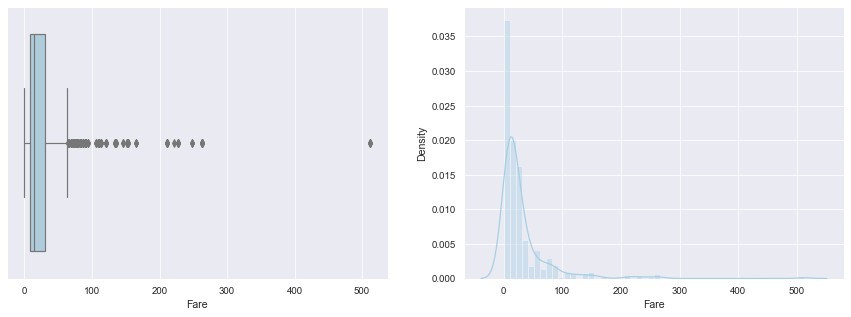

In [701]:
fig , axis = plt.subplots(nrows = 1 , ncols = 2 , figsize = (15 , 5))
sns.boxplot(df['Fare'] , ax = axis[0])
sns.distplot(df['Fare'] , ax = axis[1])

In [702]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         18.878719
Fare         0.000000
Embarked     0.000000
dtype: float64

###### impute outlier point that > 100 in flare 

In [703]:
df['Fare'].loc[df[df['Fare'] > 100 ].index] = np.nan

In [704]:
df.isnull().mean()*100

Survived     0.000000
Pclass       0.000000
Sex          0.000000
Age         18.878719
Fare         6.064073
Embarked     0.000000
dtype: float64

In [705]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

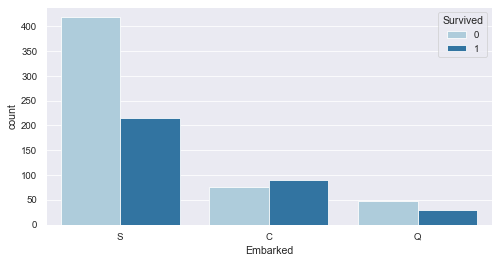

In [706]:
sns.countplot(data = df , x = 'Embarked' , hue = 'Survived')

###### imputer missing records with KNN imputer 

In [707]:
imp = KNNImputer()

In [708]:
col_to_imput = ['Age' , 'Fare']

In [709]:
df[col_to_imput] = imp.fit_transform(df[col_to_imput])

In [710]:
df.isnull().mean()*100

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
Embarked    0.0
dtype: float64

###### encode categorical Feature using one hot encoder 

In [711]:
df['Sex'] = df['Sex'].apply(lambda x : 1 if x == 'male' else 0)

In [712]:
col_to_encd = ['Embarked']

In [713]:
encdr = OneHotEncoder(sparse = False , drop = 'first')

In [714]:
df = pd.concat([df , pd.DataFrame(encdr.fit_transform(df[col_to_encd]) ,
                                 columns = encdr.get_feature_names_out())], axis = 1)

In [715]:
df.drop(['Embarked'] , axis = 1 , inplace = True)

In [882]:
x = df.drop(['Survived'] , axis = 1)
y = df['Survived']

###### use SMOTE to balance our target data 

In [883]:
sm = SMOTE(random_state = 7)
x , y = sm.fit_resample(x , y)

In [884]:
x_train , x_test , y_train , y_test = train_test_split(x , y , stratify = y ,
                                                       test_size = 0.25 , random_state = 7
                                                       ,shuffle = True) 

###### put our numerical features in same scale  

In [885]:
col_to_scl = ['Age' , 'Fare']

In [886]:
sclr = StandardScaler()

In [887]:
x_train[col_to_scl] = sclr.fit_transform(x_train[col_to_scl])

In [888]:
x_test[col_to_scl] = sclr.transform(x_test[col_to_scl])

###### make our model more complex to get good accuracy some how 

In [889]:
poly = PolynomialFeatures(degree = 5)

In [890]:
x_train = poly.fit_transform(x_train)

In [891]:
model = LogisticRegression()

In [892]:
model.fit(x_train , y_train)

LogisticRegression()

In [893]:
y_train_pred = model.predict(x_train)

In [894]:
y_test_pred = model.predict(poly.transform(x_test))

###### train data accuracy 

In [895]:
accuracy_score(y_true = y_train , y_pred = y_train_pred)

0.8555555555555555

###### test data accuracy 

In [896]:
accuracy_score(y_true = y_test , y_pred = y_test_pred)  

0.8407407407407408